<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/Bace(5nd_version)(SGD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from pandas import read_csv
from sklearn.impute import SimpleImputer
import pandas as pd
import io
#visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import random


In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving bace(lables).csv to bace(lables) (2).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bace_global_cdf_rdkit.csv to bace_global_cdf_rdkit (2).csv


In [ ]:
dataX = pd.read_csv(io.BytesIO(uploaded['bace_global_cdf_rdkit.csv']))
dataX.head()

,"('RDKit2DNormalized_calculated', <class 'bool'>)","('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
0,True,0.271693,0.685231,0.715429,0.780380,0.750726,0.689887,0.776209,0.716683,0.850783,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.494794
1,True,0.392419,0.830920,0.964192,0.966658,0.963590,0.957524,0.968433,0.959626,0.970019,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.072174
2,True,0.149225,0.951733,0.924019,0.927351,0.932271,0.923493,0.923177,0.942919,0.908699,...,9.999565e-01,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.090157
3,True,0.577532,0.782187,0.924370,0.906913,0.913072,0.876879,0.885455,0.922284,0.928759,...,1.593061e-17,1.000000e+00,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.121917
4,True,0.138106,0.967050,0.945002,0.930853,0.935559,0.936328,0.928579,0.946799,0.921161,...,9.999565e-01,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.091591


In [ ]:
dataY = pd.read_csv(io.BytesIO(uploaded1['bace(lables).csv']))
dataY.head()


,mol,Class
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,1
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,1
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,1


In [ ]:
#del dataX["('RDKit2DNormalized_calculated', <class 'bool'>)"]

dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Columns: 201 entries, ('RDKit2DNormalized_calculated', <class 'bool'>) to ('qed', <class 'numpy.float64'>)
dtypes: bool(1), float64(200)
memory usage: 2.3 MB


In [ ]:
Y = dataY.iloc[:, 1]


In [ ]:
Y.value_counts()

0    822
1    691
Name: Class, dtype: int64

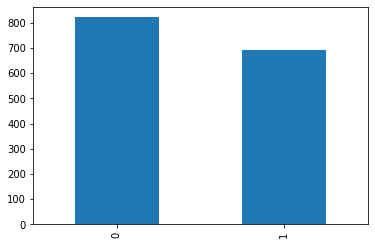

In [ ]:
Y.value_counts().plot(kind='bar')


In [ ]:
dataX.isnull().sum().sum()

0

**Corrolation** **matrix**



In [ ]:
# corr_matrix = dataX.corr()
#  #This approach is fatsitc it looks at the previous column if the correlation is high it removes it

# # Create correlation matrix
# corr_matrix = dataX.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(
#     np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# # Find features with correlation greater than 0.90
# to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# # Drop features
# data = dataX.drop(to_drop, axis=1)
# data

**Split** **Data**



In [ ]:
random.seed(10)

In [ ]:
from sklearn.model_selection import train_test_split
X=dataX.iloc[:,1:201]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,random_state=1)

In [ ]:
# X_train = np.array(X_train)
# X_test = np.array(X_test)
# Y_train = np.array(Y_train)
# Y_test = np.array(Y_test)

**Scaling** **data**


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import random
# np.random.seed(10)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)
from sklearn import preprocessing

scaler_data = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test = scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.values.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.values.reshape(-1, 1))

# print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#print(X_train)
#print("Train labels before scaling: {} {} {}Train labels after scaling: {} {}".format('\n',train_labels_before,'\n', '\n', train_labels))

**PCA**

In [ ]:
# from sklearn.decomposition import PCA as sklearnPCA
# pca = sklearnPCA(n_components=40)
# pca.fit(X_train_scaled)
# X_train_scaled=pca.transform(X_train_scaled)
# X_test_scaled=pca.transform(X_test_scaled)
# #print(pca.explained_variance_ratio_)
# plt.plot(np.arange(40),pca.explained_variance_ratio_)
# plt.show()

# X_test_scaled.shape

**transform** **to** **torch** **tensor**


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# transform to torch tensor

tensor_x = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x2 = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y = torch.tensor(Y_train, dtype=torch.float).to(device)
tensor_y2 = torch.tensor(Y_test, dtype=torch.float).to(device)

In [ ]:
# create your dataset

trainset = TensorDataset(tensor_x, tensor_y) 
testset = TensorDataset(tensor_x2,tensor_y2)

In [ ]:
trainset

In [ ]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [ ]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [ ]:
def load_data(data_dir=None):
    return trainset, testset

In [ ]:
from sklearn.metrics import roc_auc_score

def compute_score(model, data_loader, device="cpu"):
    model.eval()
    metric = roc_auc_score
    with torch.no_grad():
        prediction_all= torch.empty(0, device=device)
        labels_all= torch.empty(0, device=device)
        for i, (feats, labels) in enumerate(data_loader):
            feats=feats.to(device)
            labels=labels.to(device)
            prediction = model(feats).to(device)
            prediction = torch.sigmoid(prediction).to(device)
            prediction_all = torch.cat((prediction_all, prediction), 0)
            labels_all = torch.cat((labels_all, labels), 0)                
        try:
            t = metric(labels_all.int().cpu(), prediction_all.cpu()).item()
        except ValueError:
            t = 0
    return t

In [ ]:
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()
        
        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1", 100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2", 100))
        self.hidden_dim3 = int(self.config.get("hidden_dim3", 100))


        self.act1 = self.config.get("act1", "relu") 
        self.act2 = self.config.get("act2", "relu") 
        self.act3 = self.config.get("act3", "relu")

        self.linear1 = nn.Linear(200, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, self.hidden_dim3)
        self.linear4 = nn.Linear(self.hidden_dim3, 1)
    
    @staticmethod
    def activation_func(act_str):
        if act_str=="tanh":
            return eval("torch."+act_str)
        elif act_str=="selu" or act_str=="relu":   
            return eval("torch.nn.functional."+act_str)

    def forward(self, x):
        output = self.linear1(x)
        output = self.activation_func(self.act1)(output)
        output = self.linear2(output)
        output = self.activation_func(self.act2)(output)
        output = self.linear3(output)
        output = self.activation_func(self.act3)(output)
        output = self.linear4(output)        
        return output

In [ ]:
model = Net({})

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [ ]:
summary(model, (1,tensor_x.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]          20,100
            Linear-2               [-1, 1, 100]          10,100
            Linear-3               [-1, 1, 100]          10,100
            Linear-4                 [-1, 1, 1]             101
Total params: 40,401
Trainable params: 40,401
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.15
Estimated Total Size (MB): 0.16
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |   20000    |
|  linear1.bias  |    100     |
| linear2.weight |   10000    |
|  linear2.bias  |    100     |
| linear3.weight |   10000    |
|  linear3.bias  |    100     |
| linear4.we

40401

In [ ]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    criterion = nn.CrossEntropyLoss()
    #criterion=nn.BCELoss()

    ## Regression
    #criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = torch.optim.SGD(net.parameters(), lr=config.get("lr",0.0003),momentum=0.9)

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.825)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # # Validation loss
        # val_loss = 0.0
        # net.eval() # Prepare model for evaluation
        # for i, data in enumerate(valloader):
        #     with torch.no_grad():
        #         inputs, labels = data
        #         inputs, labels = inputs.to(device), labels.to(device)

        #         outputs = net(inputs)
        score = compute_score(net, valloader, device="cpu")

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)
        tune.report(score=score)
        #         # Inverse transform of the labels' scaler
        #         outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
        #         labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

        #         loss = criterion(outputs, labels)
        #         val_loss += loss.cpu().numpy()


         #Validation loss
        # val_loss = 0.0
        # val_steps = 0
        # total = 0
        # correct = 0
        # for i, data in enumerate(valloader(config), 0):
        #     with torch.no_grad():
        #         inputs, labels = data
        #         inputs, labels = inputs.to(device), labels.to(device)

        #         outputs = net(inputs)
        #         _, predicted = torch.max(outputs.data, 1)
        #         total += labels.size(0)
        #         correct += (predicted == labels).sum().item()
                

        #         loss = criterion(outputs, labels)
        #         val_loss += loss.cpu().numpy()
        #         val_steps += 1
        # # Validation score
        # score = compute_score(net, validloader(config), device="cpu")
        # #loss = criterion(outputs, labels)

        # with tune.checkpoint_dir(epoch) as checkpoint_dir:
    #         path = os.path.join(checkpoint_dir, "checkpoint")
    #         torch.save((net.state_dict(), optimizer.state_dict()), path)
    #     tune.report(loss=(val_loss / val_steps),score=score)





    #     with tune.checkpoint_dir(epoch) as checkpoint_dir:
    #         path = os.path.join(checkpoint_dir, "checkpoint")
    #         torch.save((net.state_dict(), optimizer.state_dict()), path)

    #     tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    # print("Finished Training")

    # score = compute_score(net, valloader, device="cpu")

    #     with tune.checkpoint_dir(epoch) as checkpoint_dir:
    #         path = os.path.join(checkpoint_dir, "checkpoint")
    #         torch.save((net.state_dict(), optimizer.state_dict()), path)
    #     tune.report(score=score)
    #     # Inverse transform of the labels' scaler  این دو خط رو کامنت کردی!!!!!
    #             outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
    #             labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

    #              loss = criterion(outputs, labels)
    #              val_loss += loss.cpu().numpy()

    #     with tune.checkpoint_dir(epoch) as checkpoint_dir:
    #          path = os.path.join(checkpoint_dir, "checkpoint")
    #          torch.save((net.state_dict(), optimizer.state_dict()), path)

    #      tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")









**Test** **set** **score**

In [ ]:
def test_score(config, net , device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    best_trained_model=net
    criterion = nn.CrossEntropyLoss()
    # # Test loss
    # test_loss = 0.0
    # net.eval() # Prepare model for evaluation
    # for i, data in enumerate(testloader):
    #     with torch.no_grad():
    #         inputs, labels = data
    #         inputs, labels = inputs.to(device), labels.to(device)

    #         outputs = net(inputs)
    test_score = compute_score(best_trained_model, testloader, device)
    print("Best trial test set score: {}".format(test_score))
            # Inverse transform of the labels' scaler
            #outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            #labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)
            
    #         loss = criterion(outputs, labels)
    #         test_loss += loss.cpu().numpy()

    # return test_loss / len(testset)


Start Ray runtime

In [ ]:
ray.shutdown()
ray.init(num_cpus=2, num_gpus=0) # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
#ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")

{'memory': 7895787111.0, 'CPU': 2.0, 'node:172.28.0.2': 1.0, 'object_store_memory': 3947893555.0}


'Check Ray Tune is working properly (for trainable class)'

In [ ]:
def test_score2(best_trial):
    trainset, testset = load_data()
    testloader = torch.utils.data.DataLoader(testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    best_trained_model = NeuralNetwork(np.shape(feature_selection[0])[0],best_trial.config["l1"],best_trial.config["l2"],best_trial.config["l3"],best_trial.config)
    device = "cuda:0" if torch.cuda.is_available() else "cpu"
    best_trained_model.to(device)

    checkpoint_path = os.path.join(best_trial.checkpoint.value, "checkpoint")

    model_state, optimizer_state = torch.load(checkpoint_path)
    best_trained_model.load_state_dict(model_state)

    test_score = compute_score(best_trained_model, testloader(best_trial.config), device)
    print("Best trial test set score:- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - {} ".format(test_score))
    return best_trial.config, best_trained_model

Start hyperparameter tuning

In [ ]:
%%capture
try:
    import optuna
except:
    %pip install optuna
    import optuna

In [ ]:
def main(num_samples=100, max_num_epochs=15, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "l1": tune.choice([2**2,2**3,2**4,2**5,2**6,2**7,2**8]), #tune.sample_from(lambda _: 2**np.random.randint(2, 8)),
        "l2": tune.choice([2**2,2**3,2**4,2**5,2**6,2**7,2**8]), #tune.sample_from(lambda _: 2**np.random.randint(2, 8)),
        "l3": tune.choice([2**2,2**3,2**4,2**5,2**6,2**7,2**8]), #tune.sample_from(lambda _: 2**np.random.randint(2, 8)),
        "lr": tune.loguniform(1e-4, 1e-1),
        "batch_size": tune.choice([4,8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }
    

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="score", #or accuracy, etc.
        mode="max", #or max
        seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)

    scheduler = ASHAScheduler(
        metric ="score",
        mode="max",
        max_t=max_num_epochs,
        reduction_factor=2, 
        grace_period=4,
        brackets=5
        )
    
    reporter = CLIReporter(
        parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["score", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="score",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("score", "max", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["score"]))
# ////////
    best_trained_model = Net(best_trial.config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))
#///////////
    # if ray.util.client.ray.is_connected():
    #     # If using Ray Client, we want to make sure checkpoint access
    #     # happens on the server. So we wrap `test_best_model` in a Ray task.
    #     # We have to make sure it gets executed on the same node that
    #     # ``tune.run`` is called on.
    #     from ray.util.ml_utils.node import force_on_current_node
    #     remote_fn = force_on_current_node(ray.remote(test_score2))
    #     ray.get(remote_fn.remote(best_trial))
    # else:
    #    best_trial.config, best_trained_model=test_score2(best_trial)
    # print("--------------------------------------------------")
    # return best_trial.config, best_trained_model

if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=100, max_num_epochs=15, gpus_per_trial=0)

2022-07-18 22:57:54,288	INFO logger.py:630 -- pip install "ray[tune]" to see TensorBoard files.
2022-07-18 22:57:54,290	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-18 22:57:54 (running for 00:00:00.48)
Memory usage on this node: 1.8/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None
Bracket: Iter 8.000: None
Bracket: 
Bracket: 
Bracket: 
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_22-57-54
Number of trials: 1/100 (1 RUNNING)
+-------------------------+----------+-----------------+------+------+------------+--------------+
| Trial name              | status   | loc             |   l1 |   l2 |         lr |   batch_size |
|-------------------------+----------+-----------------+------+------+------------+--------------|
| trainable_func_0ec9066c | RUNNING  | 172.28.0.2:1758 |   16 |   64 | 0.00664714 |           32 |
+-------------------------+----------+-----------------+------+------+------------+--------------+


Trial trainable_func_0ec9066c reported score=0.3609709962168979,sh

2022-07-18 23:07:53,556	INFO tune.py:748 -- Total run time: 599.30 seconds (599.10 seconds for the tuning loop).


Trial trainable_func_5b929958 reported score=0.6647435897435897,should_checkpoint=True with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'l1': 256, 'l2': 128, 'l3': 256, 'lr': 0.015176425806702608, 'batch_size': 4, 'hidden_dim1': 140.0, 'hidden_dim2': 80.0, 'hidden_dim3': 60.0}. This trial completed.
== Status ==
Current time: 2022-07-18 23:07:53 (running for 00:09:59.13)
Memory usage on this node: 1.7/12.7 GiB
Using AsyncHyperBand: num_stopped=48
Bracket: Iter 8.000: 0.5649744195198741 | Iter 4.000: 0.4765840220385675
Bracket: Iter 8.000: 0.46298711532857717
Bracket: 
Bracket: 
Bracket: 
Resources requested: 0/2 CPUs, 0/0 GPUs, 0.0/7.35 GiB heap, 0.0/3.68 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-18_22-57-54
Number of trials: 100/100 (100 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+--------------+----------+----------------------+
| Trial name              | status     | loc             |  

# Other Schedulers and search algorithms of Ray Tune

In [ ]:
!pip install -U hyperopt
!pip install hpbandster ConfigSpace
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.optuna import OptunaSearch  
from ray.tune.suggest.dragonfly import DragonflySearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.schedulers.hb_bohb import HyperBandForBOHB
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.schedulers import MedianStoppingRule
from ray.tune.schedulers import PopulationBasedTraining
from ray.tune.suggest.bohb import TuneBOHB
from ray.tune.suggest.basic_variant import BasicVariantGenerator
from ray.tune.suggest import ConcurrencyLimiter

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Schedulers**

In [ ]:
training_iteration = 50 #max_num_epochs

## ASHA
scheduler = AsyncHyperBandScheduler(
    time_attr="training_iteration",
    max_t=training_iteration,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    reduction_factor=2, 
    grace_period=4,
    brackets=5,
    )

## BOHB
scheduler = HyperBandForBOHB(
    time_attr="training_iteration",
    max_t=training_iteration, 
    reduction_factor=8, 
    stop_last_trials=True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )

## Median
scheduler = MedianStoppingRule(
    time_attr="training_iteration",
    grace_period=10,
    min_samples_required=10,
    hard_stop = True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )

## PBT
scheduler = PopulationBasedTraining(
    time_attr="training_iteration",
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    perturbation_interval=10,  # every 10 `time_attr` units
                            # (training_iterations in this case)
    # hyperparam_mutations={
    #     "lr": [8e-3, 7e-3, 6e-3, 5e-3, 4e-3],
    #     "dropout": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout1": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout2": tune.quniform(0.0, 0.4, 0.05),
    #     "max_norm_val":tune.choice([2.5, 3, 3.5, 4]),
    #     }
    )


# Search algorithms

In [ ]:
pip install dragonfly-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 5.4 MB/s 
  Created wheel for dragonfly-opt: filename=dragonfly_opt-0.1.6-cp37-cp37m-linux_x86_64.whl size=411412 sha256=3a8d5b8cdf8f4e84ae99e63beabe4f3fed05a2d2910766404ca6e2cc2765b47b
  Stored in directory: /root/.cache/pip/wheels/bb/79/94/461f622bdd697be30dfe11c2590b574deee78320aa6f5cc2ba
Successfully built dragonfly-opt


In [ ]:
from ray.tune.suggest.dragonfly import DragonflySearch as DragonflySearch1

In [ ]:
## BOHB
search_alg = TuneBOHB(
    # space=config_space,  # If you want to set the space manually
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    # seed = 42,
    # points_to_evaluate=[
    # ],
    )

## Hyperopt
search_alg = HyperOptSearch(
    # space=config,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    n_initial_points=60,
    # gamma = 0.1,
    # random_state_seed=42,
    # points_to_evaluate=[{"max_norm_val": 2.5, 'GNN_Layers': 3, 'dropout': 0.25, 'dropout1': 0.35, 'dropout2': 0.15, 'lr': 0.001, 'hidden_size': 80, 'readout1_out': 150, 'readout2_out': 100, 'batch_size': 64}],
    )

## Optuna
search_alg = OptunaSearch(
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    # seed = 42,
    # points_to_evaluate=[
    # {'dropout': 0.2, 'dropout1': 0.1, 'dropout2': 0.25, 'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0, 'max_norm_val': 2.5}
    # ],
    )

## Dragonfly
#search_alg = DragonflySearch1(
#    metric="loss", #or accuracy, etc.
#    mode="min", #or max
#    optimizer="bandit", #[random, bandit, genetic]
    # points_to_evaluate=[
    # {'max_norm_val': 2.5, 'dropout': 0.3, 'dropout1': 0.1, 'dropout2': 0.0, 'lr': 0.0008, 'hidden_size': 90, 'readout1_out': 150, 'readout2_out': 140}
    # ],
    # domain=euclidean, #[cartesian, euclidean]
#    )

## Bayesopt
#search_alg = BayesOptSearch(
#    metric="loss", #or accuracy, etc.
#    mode="min", #or max
#    random_search_steps = 60, 
    # points_to_evaluate=[
    # {'max_norm_val': 2.5, 'dropout': 0.3, 'dropout1': 0.1, 'dropout2': 0.0, 'lr': 0.0008, 'hidden_size': 90, 'readout1_out': 150, 'readout2_out': 140}
    # ],
#    )
